In [292]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from unidecode import unidecode

# Loading in the data

In [293]:
numerical_size_reported = pd.read_csv("numerical_size_reported.csv")
pop = pd.read_csv("UNdata_population.csv", low_memory=False)

In [294]:
pop = pop[pop['Sex'] == 'Both Sexes']
pop = pop[['Country or Area', 'Year', 'City', 'Value']]
pop['City'] = pop['City'].str.lower()
pop['City'] = pop['City'].apply(unidecode)
pop['Year'] = pop['Year'].astype(int)

# Check out Mexico

In [295]:
MEX_pop = pop[pop['Country or Area'] == "Mexico"].reset_index(drop=True)
MEX_pop = MEX_pop[['Year', 'City', 'Value']]
MEX_pop = MEX_pop.rename(columns={"Year": "Year", "City": "City", "Value": "Population"})

In [296]:
MEX_pop.describe()

,Year,Population
count,1176.000000,1.176000e+03
mean,2014.726190,8.194958e+05
std,5.306586,2.150622e+06
min,2005.000000,1.000000e+00
25%,2010.000000,1.737609e+05
50%,2016.000000,3.464371e+05
75%,2020.000000,7.757152e+05
max,2022.000000,2.216752e+07


In [297]:
MEX = numerical_size_reported[numerical_size_reported['iso3'] == 'MEX']
MEX = MEX[['year', 'location', 'numerical_size']].reset_index(drop=True)
MEX['location'] = MEX['location'].str.lower()
MEX = MEX.rename(columns={"year": "Year", "location": "City", "numerical_size": "Protest_size"})

## A LOT of NA's but let's continue for now

In [298]:
MEX_merged = pd.merge(MEX, MEX_pop, on=['City','Year'], how='left')
MEX_merged_valid = MEX_merged[~MEX_merged['Population'].isnull()].copy()

MEX_merged_valid['Population'] = MEX_merged_valid['Population'].apply(lambda x: '{:.2f}'.format(x))
MEX_merged_valid['Population'] = MEX_merged_valid['Population'].astype(float)
len(MEX_merged_valid)/len(MEX)

0.22586206896551725

## Graphing

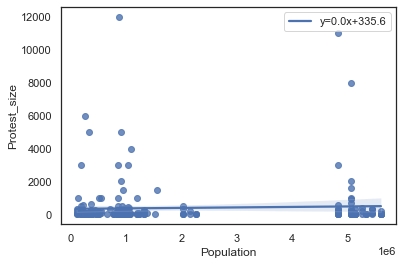

In [259]:
sns.set_theme(style="white")

slope, intercept, r_value, p_value, std_err = stats.linregress(MEX_merged_valid['Population'],MEX_merged_valid['Protest_size'])
ax = sns.regplot(x="Population", y="Protest_size", data=MEX_merged_valid, color='b', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

# Brazil

In [251]:
BRA_pop = pop[pop['Country or Area'] == "Brazil"].reset_index(drop=True)
BRA_pop = BRA_pop[['Year', 'City', 'Value']]

In [252]:
BRA = numerical_size_reported[numerical_size_reported['iso3'] == 'BRA']
BRA = BRA[['year', 'location', 'numerical_size']].reset_index(drop=True)
BRA['location'] = BRA['location'].str.lower()
BRA = BRA.rename(columns={"year": "Year", "location": "City", "numerical_size": "Protest_size"})

In [254]:
BRA_merged = pd.merge(BRA, BRA_pop, on=['City','Year'], how='left')
BRA_merged_valid = BRA_merged[~BRA_merged['Value'].isnull()].copy()

# BRA_merged_valid['Value'] = BRA_merged_valid['Value'].apply(lambda x: '{:.2f}'.format(x))
# BRA_merged_valid['Value'] = BRA_merged_valid['Value'].astype(float)
BRA_merged_valid

,Year,City,Protest_size,Value


No handles with labels found to put in legend.


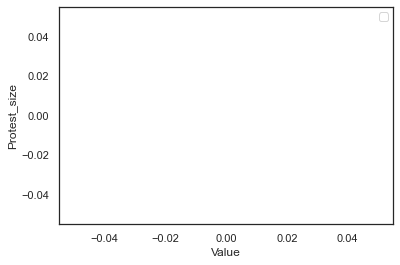

In [226]:
sns.set_theme(style="white")

slope, intercept, r_value, p_value, std_err = stats.linregress(MEX_merged_valid['Value'],MEX_merged_valid['Protest_size'])
ax = sns.regplot(x="Value", y="Protest_size", data=BRA_merged_valid, color='b', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()